In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from nltk.tokenize import word_tokenize 
from collections import Counter
import re
import seaborn as sns


In [2]:
movies = pd.read_csv('Data/movies_df.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9863 non-null   int64  
 1   Unnamed: 0.1       9863 non-null   int64  
 2   id                 9863 non-null   int64  
 3   original_language  9863 non-null   object 
 4   original_title     9863 non-null   object 
 5   popularity         9863 non-null   float64
 6   release_date       9839 non-null   object 
 7   vote_average       9863 non-null   float64
 8   vote_count         9863 non-null   int64  
 9   genre              9863 non-null   object 
 10  overview           9863 non-null   object 
 11  revenue            9863 non-null   int64  
 12  runtime            9858 non-null   float64
 13  tagline            7077 non-null   object 
 14  summary_length     9863 non-null   int64  
 15  Unnamed: 15        9863 non-null   int64  
 16  Action             9863 

In [3]:
#Using this code to turn the genre from strings into list 
movie_genre = [i.strip('[]').split(",") for i in movies.genre]
for movie in (movie_genre):
    for number, genres in enumerate(movie):
        movie[number] = genres.strip("' '")
movies['genre'] =  movie_genre

In [4]:
movie_len = []
for i in range(0, len(movies)):
    movie_len.append(len(movies.overview[i]))
movies['summary_length'] = movie_len

In [5]:
genre_list = movies.genre
genre_counting_list =[]
for movie in genre_list:
    [genre_counting_list.append(genre) for genre in movie]
movie_counter = Counter(genre_counting_list)
del movie_counter['']

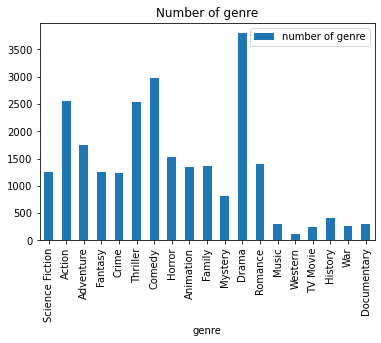

In [6]:
genre_df = pd.DataFrame({'genre': movie_counter.keys(),
                   'number of genre': movie_counter.values()})
genre_df.set_index('genre', inplace = True)
genre_df.plot(kind='bar', y='number of genre')
plt.title('Number of genre')
plt.show()

In [7]:
genre_len = defaultdict(list)
average_len =[]
for e,i in enumerate(genre_df.index):
    for number, genre in enumerate(movies.genre):
        if i in genre:
            genre_len[i].append(movies.summary_length[number])
     

In [8]:
average_len = defaultdict(list)
for i in genre_len.keys():
    average_len[i].append(np.mean(genre_len[i]))
    average_len[i] = average_len[i][0]
average_len

defaultdict(list,
            {'Science Fiction': 295.2028639618138,
             'Action': 294.7180892717306,
             'Adventure': 303.47102696500286,
             'Fantasy': 309.6951316839585,
             'Crime': 269.41362530413625,
             'Thriller': 269.4889763779528,
             'Comedy': 279.9403685092127,
             'Horror': 269.1718954248366,
             'Animation': 333.1107828655835,
             'Family': 302.5341660543718,
             'Mystery': 269.3142857142857,
             'Drama': 273.9288537549407,
             'Romance': 288.1359430604982,
             'Music': 269.9799331103679,
             'Western': 264.1507936507937,
             'TV Movie': 293.75619834710744,
             'History': 276.4714640198511,
             'War': 287.7720588235294,
             'Documentary': 282.5821917808219})

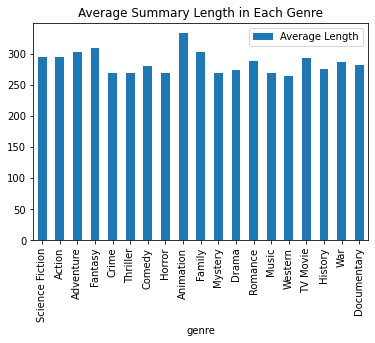

In [9]:
average_len
average_genre_df = pd.DataFrame({'genre': average_len.keys(),
                   'Average Length': average_len.values()})
average_genre_df.set_index('genre', inplace = True)
average_genre_df.plot(kind='bar', y='Average Length')
plt.title('Average Summary Length in Each Genre')
plt.show()

In [10]:
genre_df= movies['genre'].str.join('|').str.get_dummies()

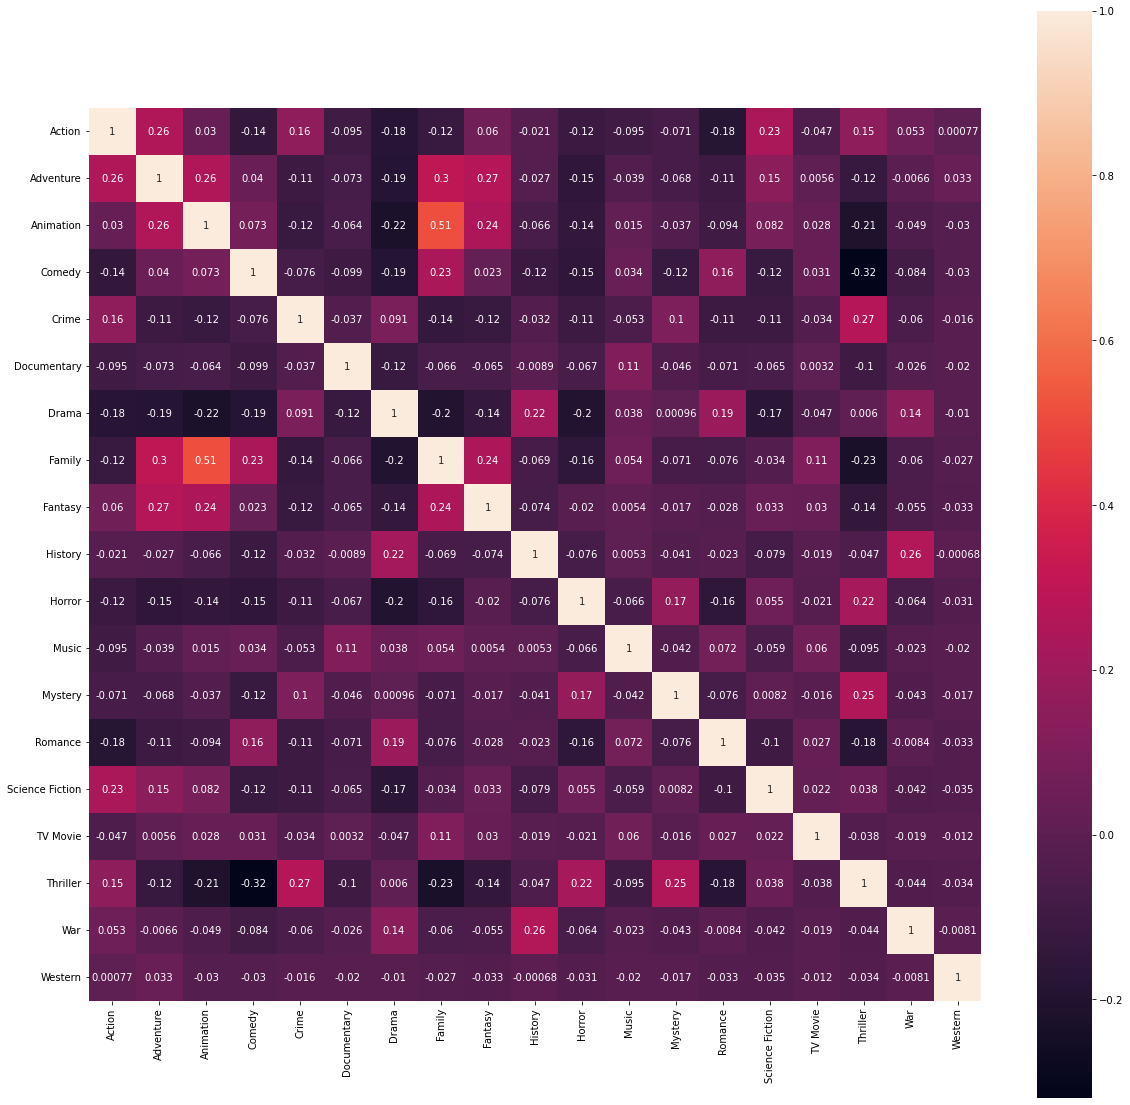

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(genre_df.corr(), square=True, annot = True)

In [12]:
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english') + list(string.punctuation)+list(str.maketrans("'","`", "'s")))

In [13]:
movie_summary = defaultdict(list)
for number,summary in enumerate(movies.overview):
    movie_summary[movies.original_title[number]].append([i for i in word_tokenize(summary) if i not in stop])
for number,summary in enumerate(movies.overview):
    movie_summary[movies.original_title[number]] = movie_summary[movies.original_title[number]][0] 

In [14]:
movies_df = movies.set_index('original_title').iloc[:,2:]

In [15]:
def genre_sort(x):
    empty = []
    for i,e in enumerate(movies_df[movies_df[x] == 1].overview):
        for word in  word_tokenize(movies_df[movies_df[x] == 1].overview[i]):
            if word.lower() not in stop and len(word) > 2:
                empty.append(word)
    return(empty)

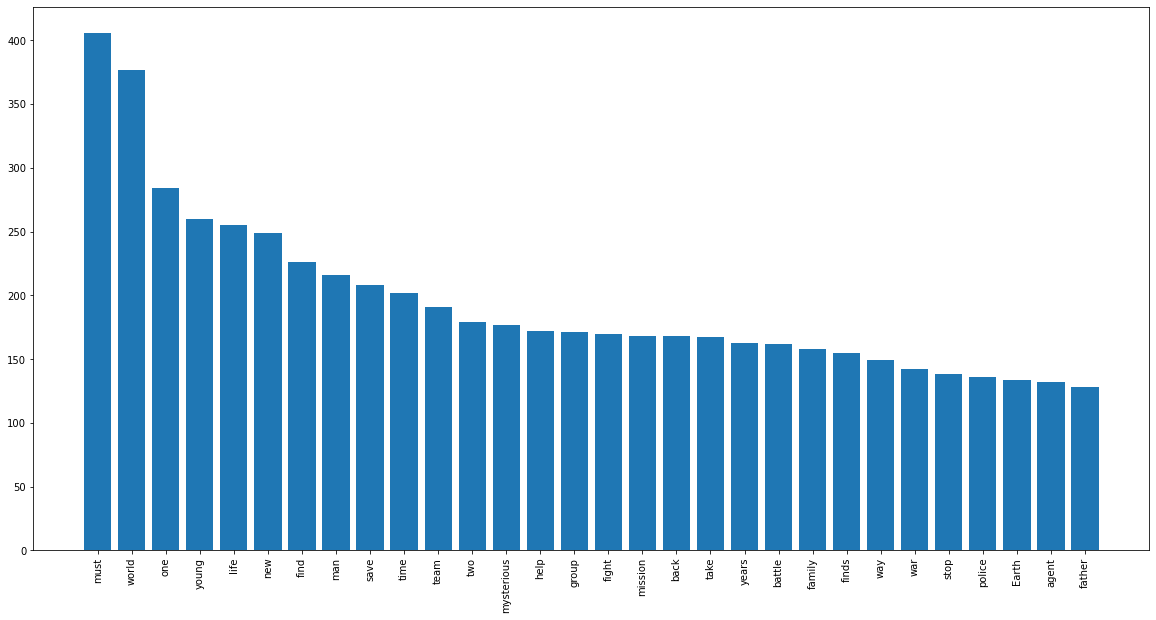

In [16]:
Action_list = Counter(genre_sort('Action')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()

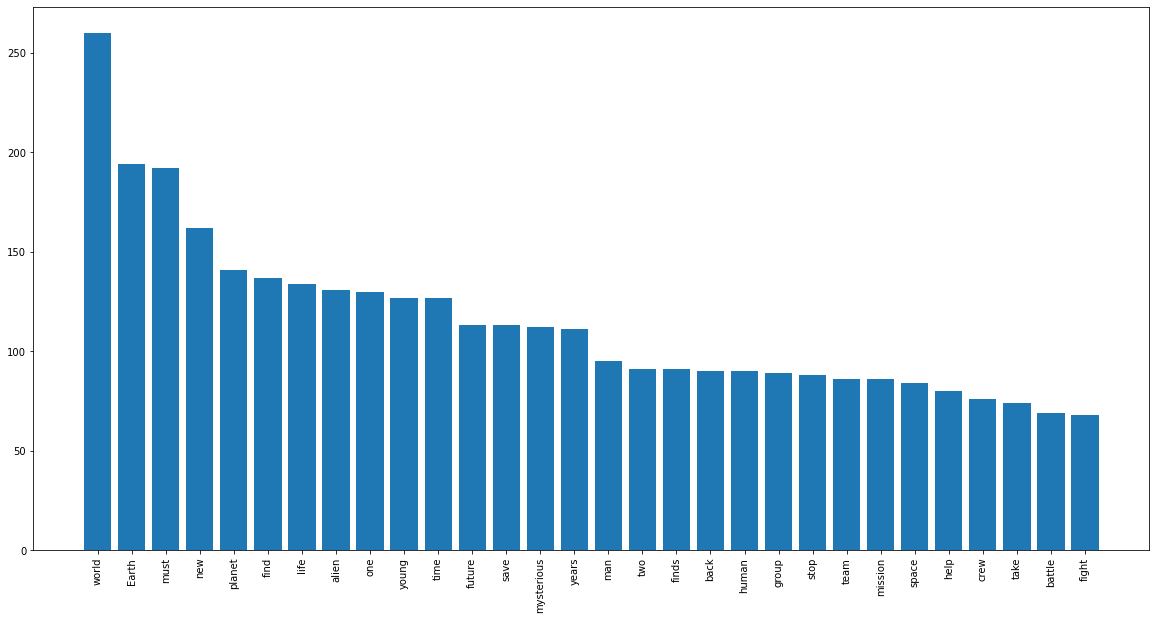

In [17]:
Science_Fiction = Counter(genre_sort('Science Fiction')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Science_Fiction))
plt.xticks(rotation = 90) 
plt.show()

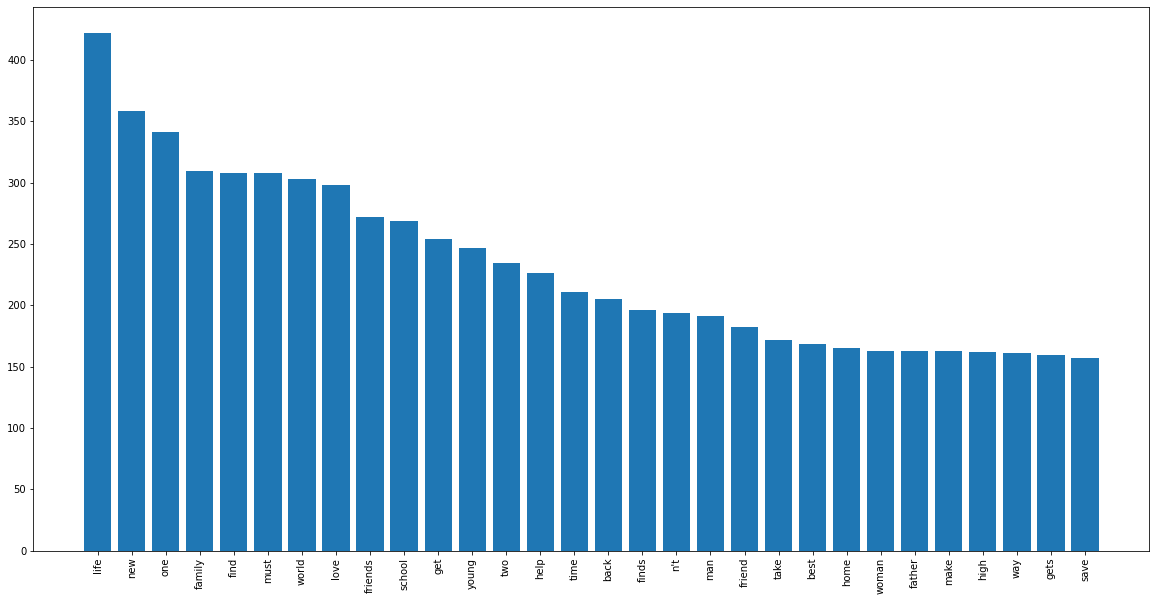

In [18]:
Comedy = Counter(genre_sort('Comedy')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Comedy))
plt.xticks(rotation = 90) 
plt.show()

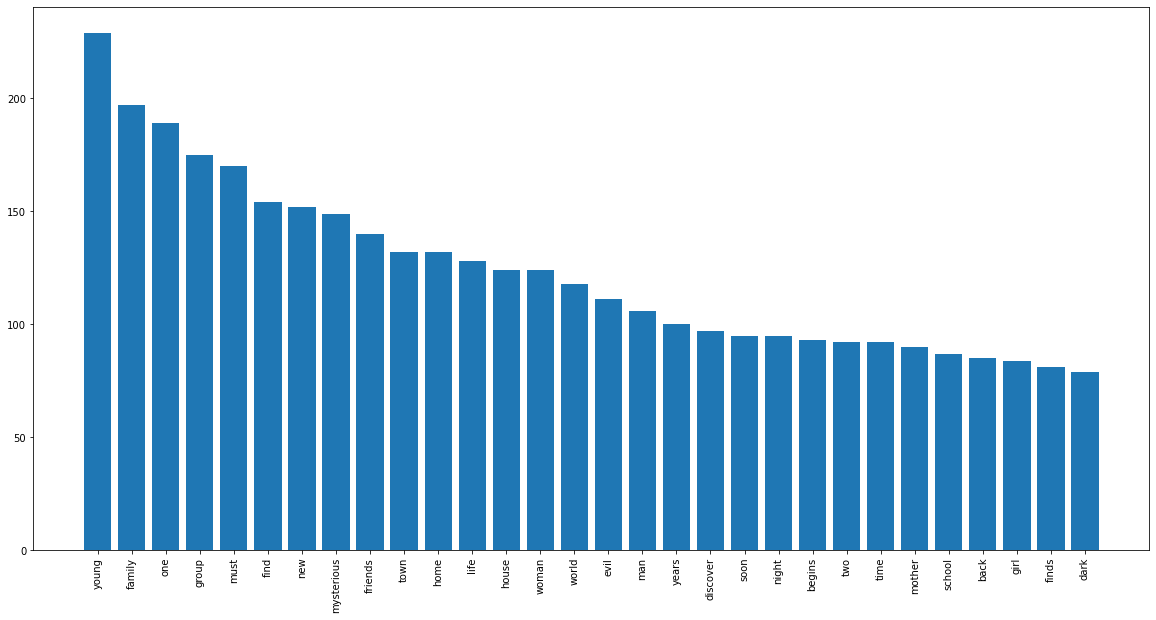

In [19]:
Comedy = Counter(genre_sort('Horror')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Comedy))
plt.xticks(rotation = 90) 
plt.show()

In [20]:
for i in range(len(movies_df)):
    movies.iloc[i].overview = re.sub(r"won't", "will not", movies.iloc[i].overview)
    movies.iloc[i].overview = re.sub(r"can't", "can not", movies.iloc[i].overview)
    
    movies.iloc[i].overview = re.sub(r"n\'t", "not", movies.iloc[i].overview)
    movies.iloc[i].overview = re.sub(r"n\'re", "are", movies.iloc[i].overview)
    movies.iloc[i].overview = re.sub(r"n\'s", "is", movies.iloc[i].overview)
    movies.iloc[i].overview = re.sub(r"n\'d", "would", movies.iloc[i].overview)
    movies.iloc[i].overview = re.sub(r"n\'ll", "will", movies.iloc[i].overview)
    movies.iloc[i].overview = re.sub(r"n\'ve", "have", movies.iloc[i].overview)
    movies.iloc[i].overview = re.sub(r"n\'m", "am", movies.iloc[i].overview)

C:\Users\sangr\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [21]:
#removing names
from nltk import pos_tag
for e, overview in enumerate(movies_df['overview']): 
    tagged_sentence = pos_tag(movies_df['overview'][e].split())
    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    new_sentence =(' '.join(edited_sentence))
    movies_df['overview'].iloc[e] = new_sentence 

C:\Users\sangr\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
#removing stop and lemmatize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english') + list(string.punctuation)+list(str.maketrans("'","`", "'s")))
cleaned_overview =[]    
for i, overview in enumerate(movies_df.overview):
    words = re.findall('[A-za-z]{2,20}', overview.lower())
    for i, e in enumerate(words):
        words[i] = lemmatizer.lemmatize(e)
    for word in words[:]:
        if word in stop:
            words.remove(word)
    cleaned_overview.append([" ".join(words)])


In [23]:
for i,e in enumerate(movies_df.overview):
    movies_df.overview[i] = cleaned_overview[i][0]

C:\Users\sangr\AppData\Local\Temp/ipykernel_4344/1145892543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.overview[i] = cleaned_overview[i][0]


In [24]:
movies_df.to_csv("Data/cleaned_overview_df.csv")

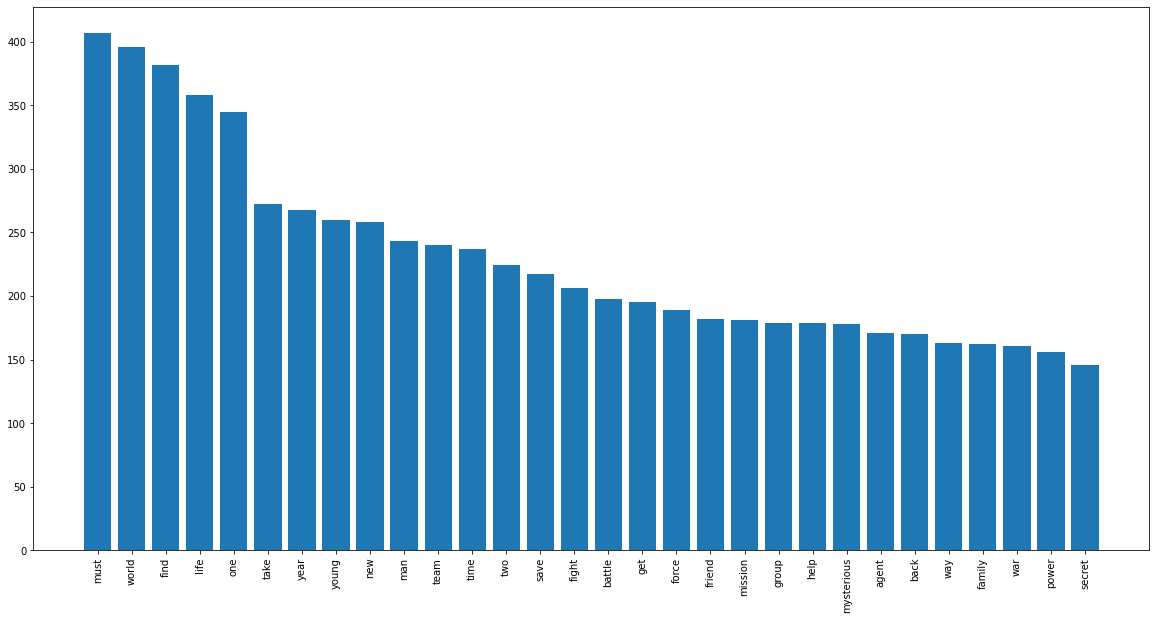

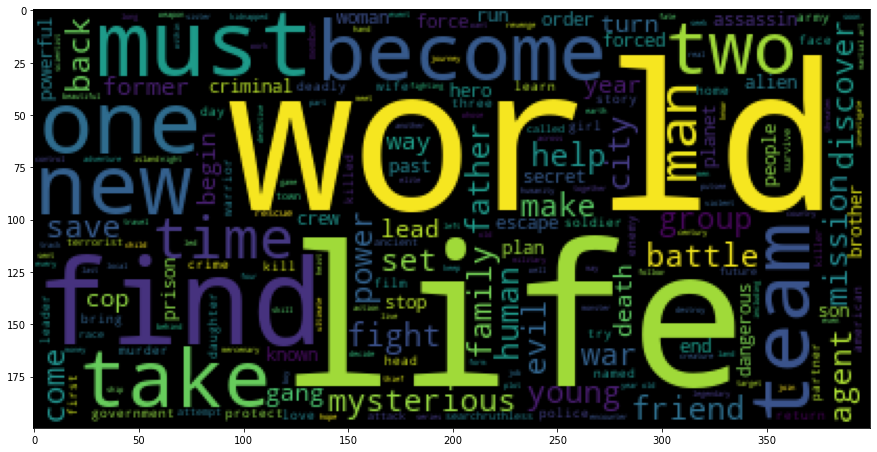

In [25]:
Action_list = Counter(genre_sort('Action')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()
from wordcloud import WordCloud
wordcloud = WordCloud().generate(" ".join(genre_sort('Action')))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

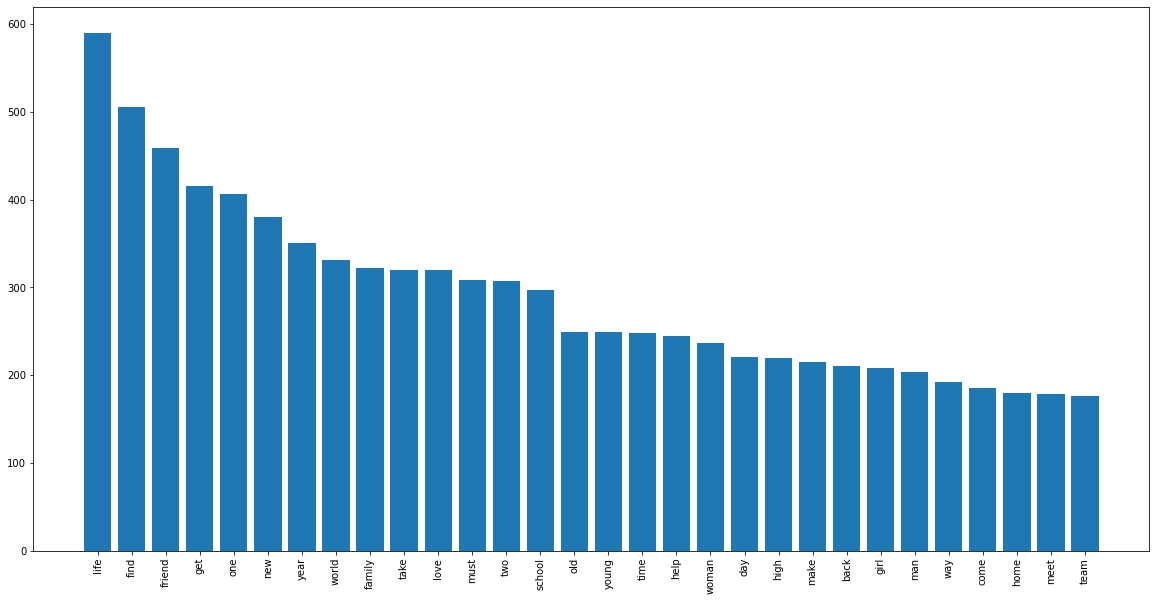

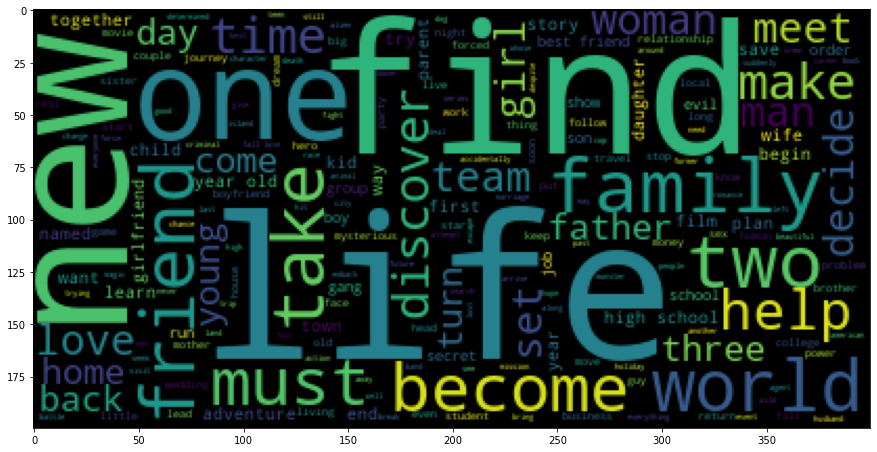

In [26]:
Action_list = Counter(genre_sort('Comedy')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()
wordcloud = WordCloud().generate(" ".join(genre_sort('Comedy')))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

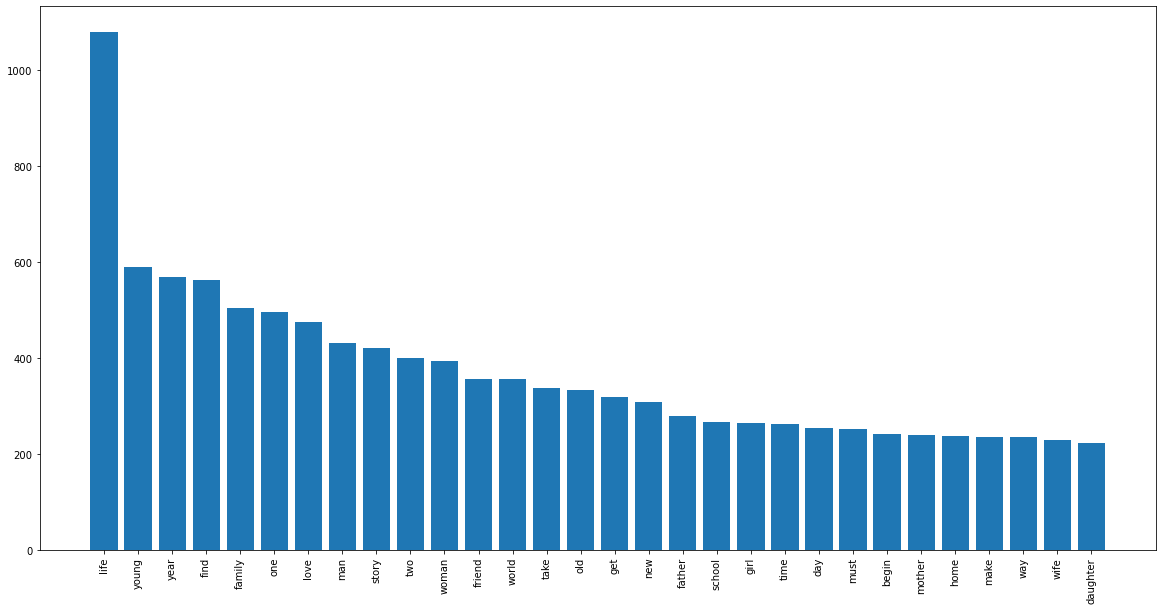

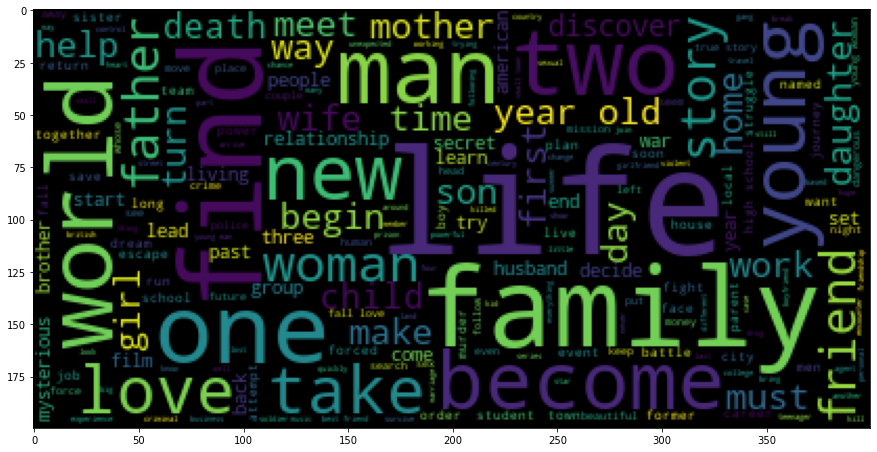

In [27]:
Action_list = Counter(genre_sort('Drama')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()
wordcloud = WordCloud().generate(" ".join(genre_sort('Drama')))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

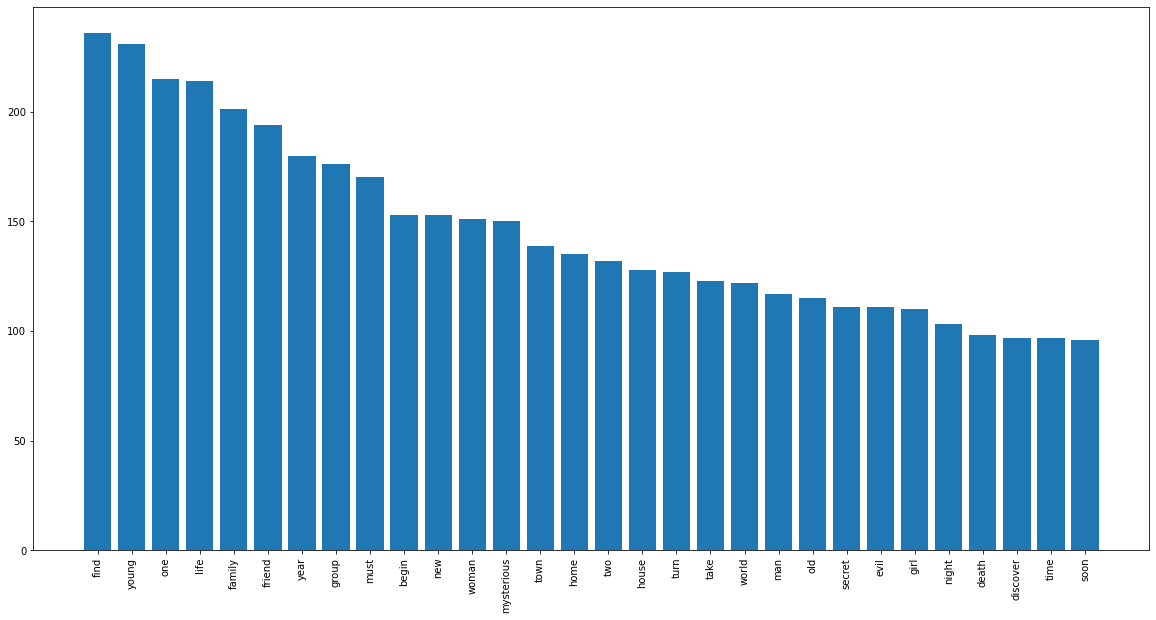

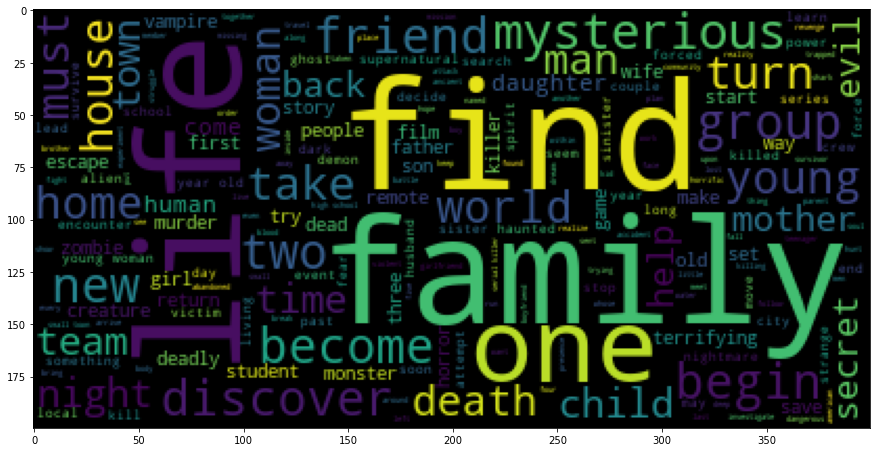

In [28]:
Action_list = Counter(genre_sort('Horror')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()
wordcloud = WordCloud().generate(" ".join(genre_sort('Horror')))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

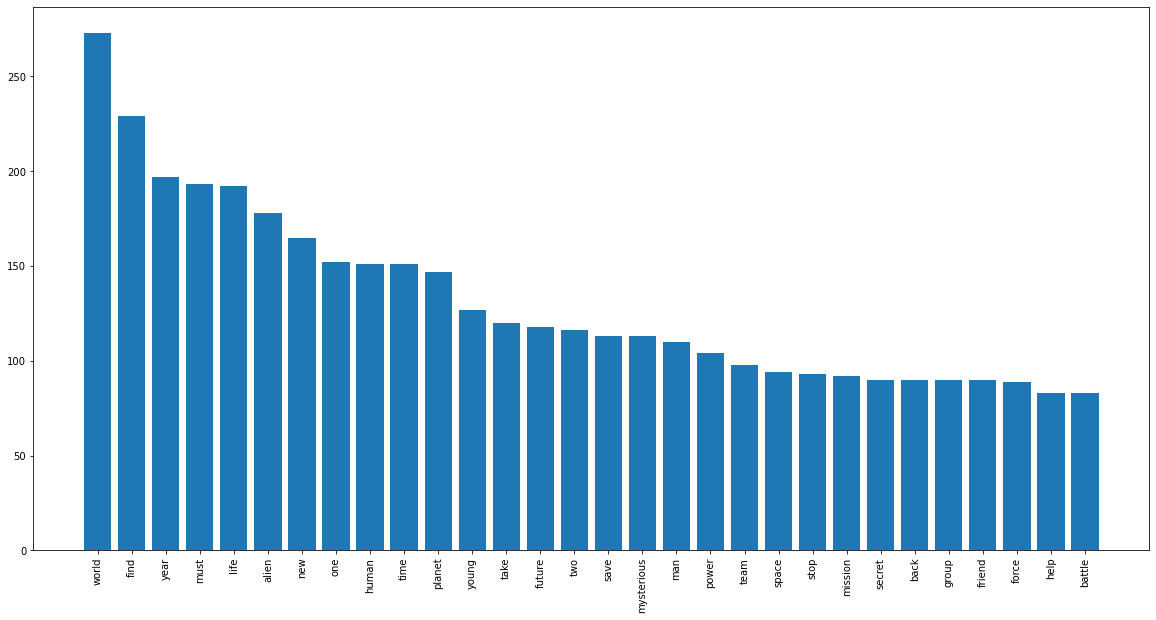

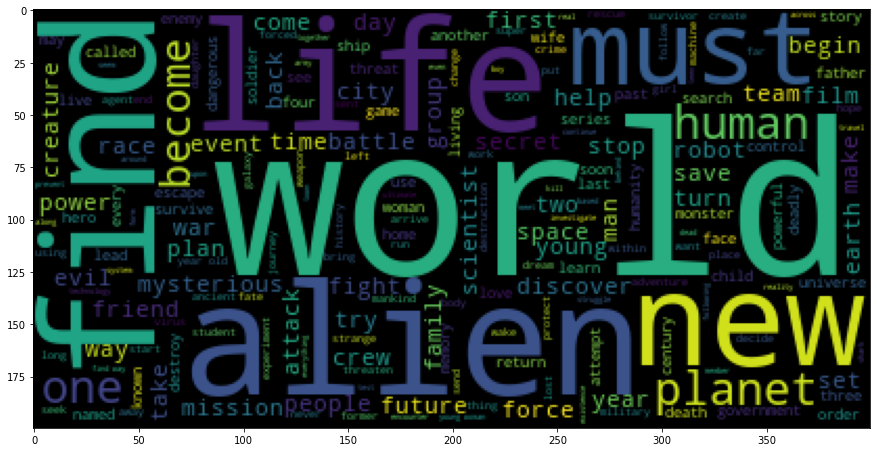

In [29]:
Action_list = Counter(genre_sort('Science Fiction')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()
wordcloud = WordCloud().generate(" ".join(genre_sort('Science Fiction')))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

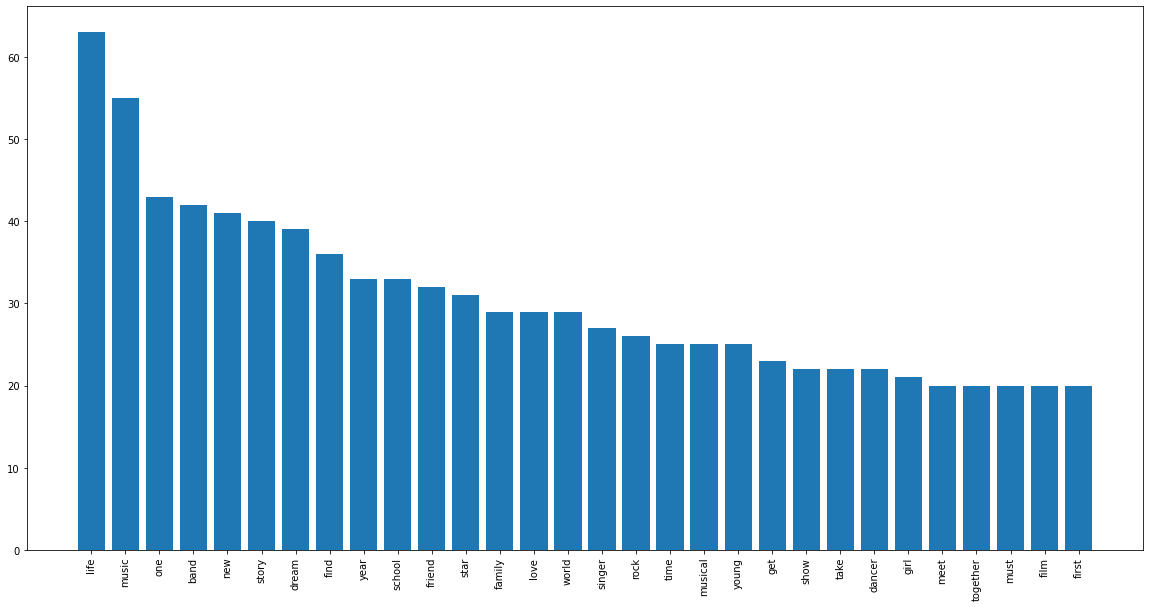

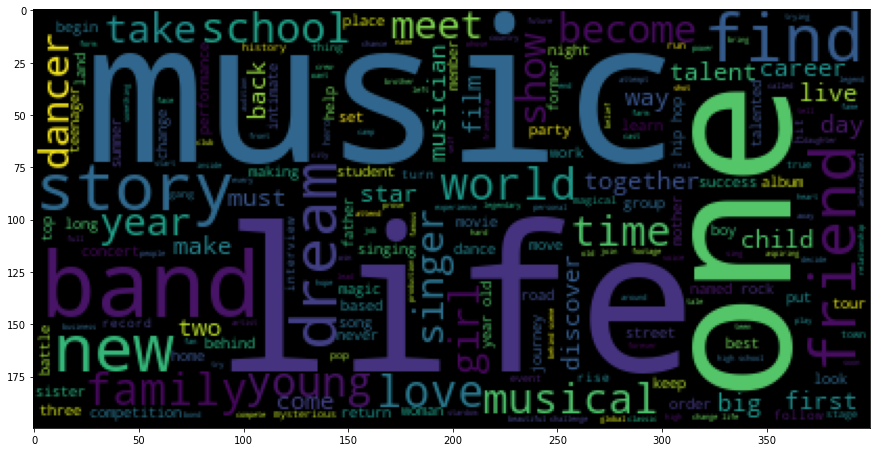

In [30]:
Action_list = Counter(genre_sort('Music')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()
wordcloud = WordCloud().generate(" ".join(genre_sort('Music')))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

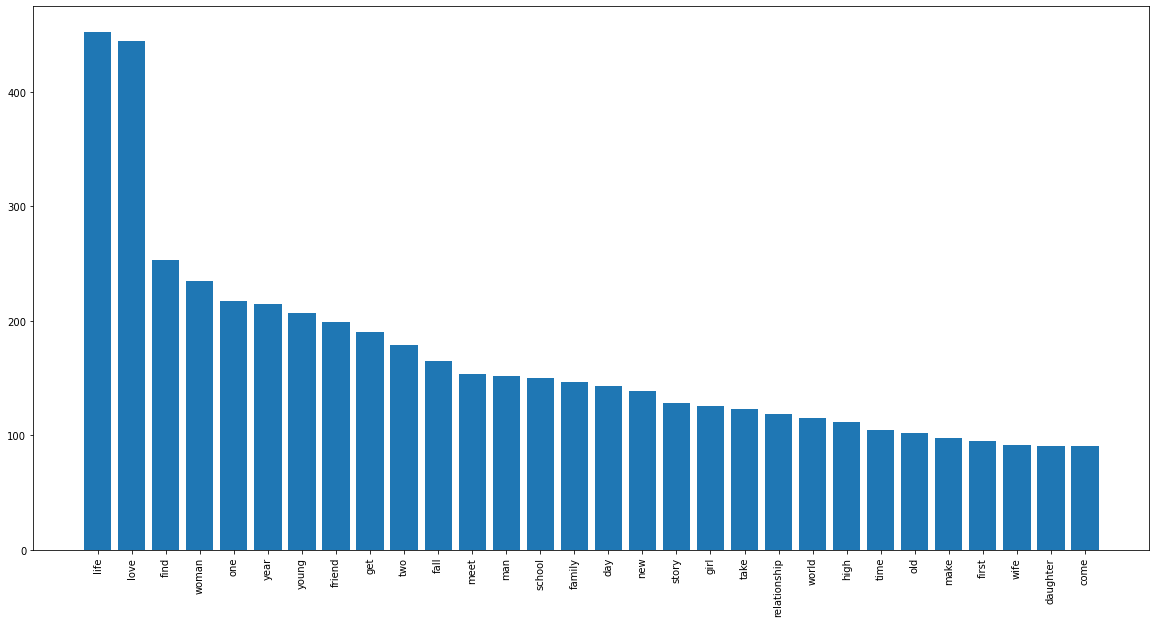

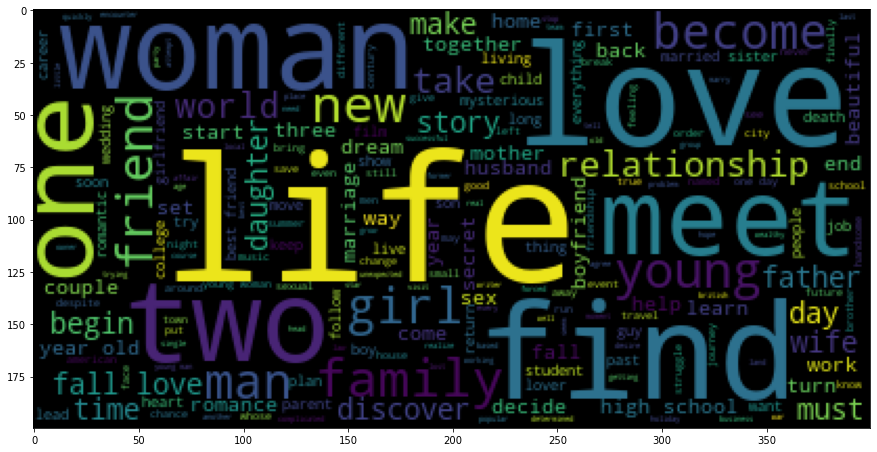

In [33]:
Action_list = Counter(genre_sort('Romance')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()
wordcloud = WordCloud().generate(" ".join(genre_sort('Romance')))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)